In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
sns.set_palette("colorblind")

# Colorblind palette
palette=["#0099CC", # Blue
        "#FFC400",  # Yellow
        "#8B9467",  # Olive
        "#FF69B4",  # Pink
        "#0097A7",  # Teal
        "#666666",  # Gray
        "#CC6600"]  # Brown-Orange

In [3]:
survey_form_path = os.path.join(os.getcwd(), 'datasets/survey.csv')

In [4]:
survey_df = pd.read_csv(survey_form_path)
survey_df.head()

,How often do you clean your keyboard?,How often do you use a public keyboard?,"When you clean your keyboard, how long does it take?",Is it pleasant or demanding to clean and sanitize your keyboard?,"On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?","After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?",What other products have you bought for keyboard cleaning? Answer 'None' if you have never bought keyboard specific cleaning products.,What features would you like to see in an autonomous keyboard cleaner?,"On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?","For cleaning, do you prefer if a human or a robot does it?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the cleaning and sanitizing job?","On a scale of 1 to 5 (5 being the best), how satisfied are you with how fast the robot comes?","On a scale of 1 to 5 (5 being very easy), how easy was it to call the robot from the web app?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the web app?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the functionality of the web app?","On a scale of 1 to 5 (5 being the best), how satisfied are you with the user interface of the admin dashboard?","On a scale of 1 to 5 (5 being the best), how informative is the admin dashboard?",What visual data would you want present in the admin dashboard?,"After observing the web app and robot integration, do you have any comments or suggestions for the product?"
0,Every month,2-3x a week,Less than 1 minute,"I do not clean it, I would not know",1,2,NaN,Low cost,5,Do not care,3,3,4,5,5,4,5,Nope,Nope
1,Every 3+ months,Almost every day,More than 10 mins,Demanding,4,4,NaN,Cleaning underneath the keys,5,Do not care,3,2,5,5,4,4,4,Support for multiple robots?,UI said keyboard was cleaned before the robot ...
2,Every 3+ months,Almost every day,1-5 mins,Demanding,3,5,"Not cleaning, but a keyboard protector",Easy to use,5,Do not care,5,4,5,5,5,5,4,"Essentially, whether it has been properly clea...",Make sure to let the user know how effective y...
3,Every week,2-3x a week,Less than 1 minute,Demanding,2,2,NaN,high speed. ability to clear up dried grime th...,3,Human should do it,3,4,5,4,5,3,3,I don’t believe I was shown the admin dashboard,no
4,Every week,No more than once a week,1-5 mins,Pleasant,4,5,Keyboard cleaning slime,Cleans properly,4,Do not care,4,4,5,4,5,4,4,Last cleaned date,Robot seems too big to be able to navigate bet...


In [5]:
TOTAL_NUM_RESPONSES = len(survey_df)

In [6]:
survey_df.columns

Index(['How often do you clean your keyboard?',
       'How often do you use a public keyboard?',
       'When you clean your keyboard, how long does it take?',
       'Is it pleasant or demanding to clean and sanitize your keyboard?',
       'On a scale of 1 to 5 (5 being you care a lot), how much do you care for a clean and sanitized keyboard?',
       'After seeing this statistic, on a scale of 1 to 5 (5 being you care a lot), how much do you care to have the public keyboards that you use cleaned and sanitized?',
       'What other products have you bought for keyboard cleaning? Answer 'None' if you have never bought keyboard specific cleaning products.',
       'What features would you like to see in an autonomous keyboard cleaner?',
       'On a scale of 1 to 5 (5 being very comfortable), how comfortable are you with a robot being used in your office space/library/lab?',
       'For cleaning, do you prefer if a human or a robot does it?',
       'On a scale of 1 to 5 (5 being the 

In [7]:
# Function to show both count and percentage
def autopct_format(pct, all_values):
    absolute = int(round(pct * sum(all_values) / 100.0))  # Convert percentage to actual count
    return f"{absolute}\n({pct:.1f}%)"  # Display count and percentage

Market Research

Q1: How often do you clean your keyboards?  
Options:
- Every day
- Every week
- Every month
- Every 3+ months
- Never

In [ ]:
q1_x_bins = ["Every day", "Every week", "Every month", "Every 3+ months", "Never"]

# Options that have not been picked even once, are shown with assigned count 0
q1_y_bins =survey_df["How often do you clean your keyboard?"].value_counts().reindex(q1_x_bins, fill_value=0)

survey_df["How often do you clean your keyboard?"].value_counts()

How often do you clean your keyboard?
Every 3+ months    7
Every month        4
Never              4
Every week         2
Name: count, dtype: int64

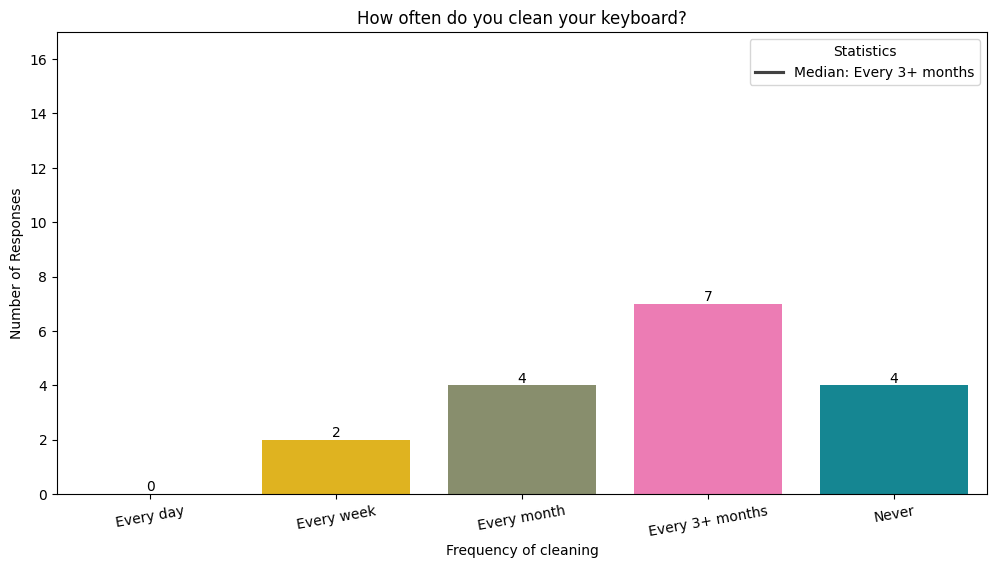

<Figure size 640x480 with 0 Axes>

In [9]:
ax = plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=q1_x_bins, y=q1_y_bins, palette=palette)

# Median Category
cumulative_counts = q1_y_bins.cumsum()
median_index = np.searchsorted(cumulative_counts, TOTAL_NUM_RESPONSES // 2)
median_category = q1_x_bins[median_index]

for i, v in enumerate(q1_y_bins):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=10)
plt.ylim(0, TOTAL_NUM_RESPONSES)
plt.legend(title="Statistics", labels=[f"Median: {median_category}"])
plt.xlabel("Frequency of cleaning")
plt.ylabel("Number of Responses")
plt.title("How often do you clean your keyboard?")
plt.show()
plt.tight_layout()

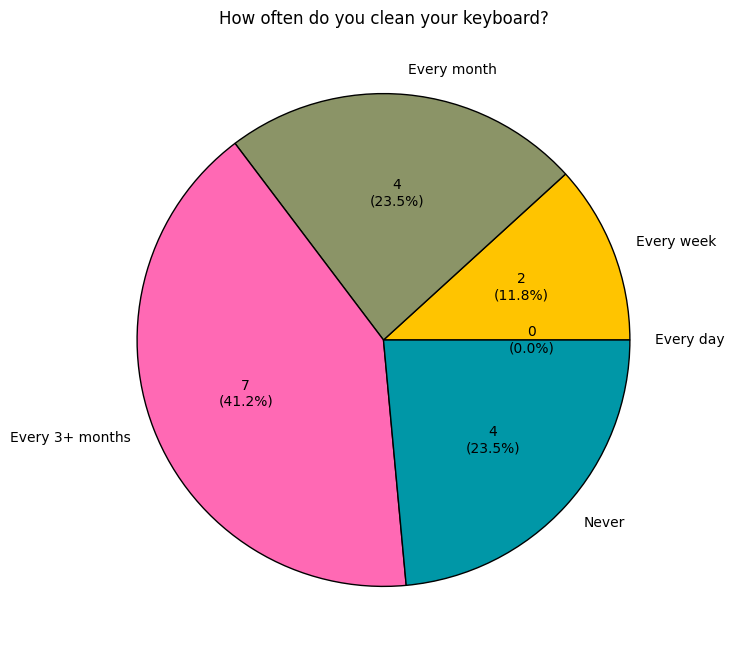

In [10]:
plt.figure(figsize=(10,8))
plt.pie(q1_y_bins, labels=q1_x_bins, autopct=lambda pct: autopct_format(pct, q1_y_bins), 
        colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('How often do you clean your keyboard?')
plt.show()